# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.158441e+01     6.529925e+00
 * time: 0.005012989044189453
     1     3.075073e+01     6.204884e+00
 * time: 0.02259206771850586
     2     2.384565e+01     6.900158e+00
 * time: 0.04505801200866699
     3     2.128919e+01     9.843236e+00
 * time: 0.06493806838989258
     4     2.018377e+01     9.144052e+00
 * time: 0.08582115173339844
     5     1.893492e+01     1.021940e+01
 * time: 0.10528802871704102
     6     1.403439e+01     5.227915e+00
 * time: 0.12463808059692383
     7     1.011977e+01     1.590490e+00
 * time: 0.15041399002075195
     8     9.348949e+00     1.183203e+00
 * time: 0.1669330596923828
     9     9.015211e+00     6.558213e-01
 * time: 0.18684601783752441
    10     8.834260e+00     5.404419e-01
 * time: 0.20301198959350586
    11     8.661745e+00     6.066365e-01
 * time: 0.21939921379089355
    12     8.507849e+00     7.603904e-01
 * time: 0.23871803283691406
    13     8.424249e+00     5.384395e-01
 * time:

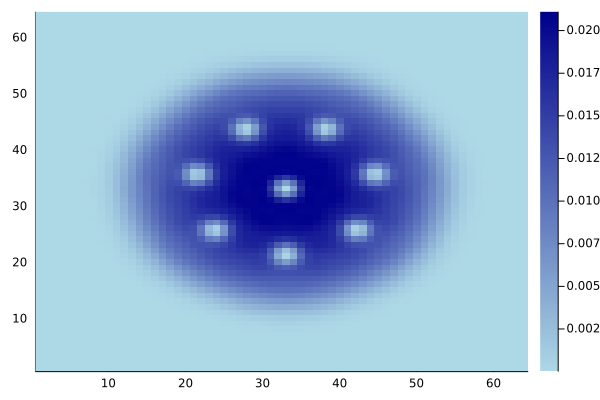

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)